In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import arch 
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})

# Load data
df = pd.read_csv('C:/Users/User/Desktop/Data speciale/SPX_indicies_data.csv', parse_dates = True, index_col = 'date')
df.index = pd.to_datetime(df.index)

data = pd.DataFrame(df['close'])
data['return'] = data['close'].pct_change()
data.dropna(inplace = True)

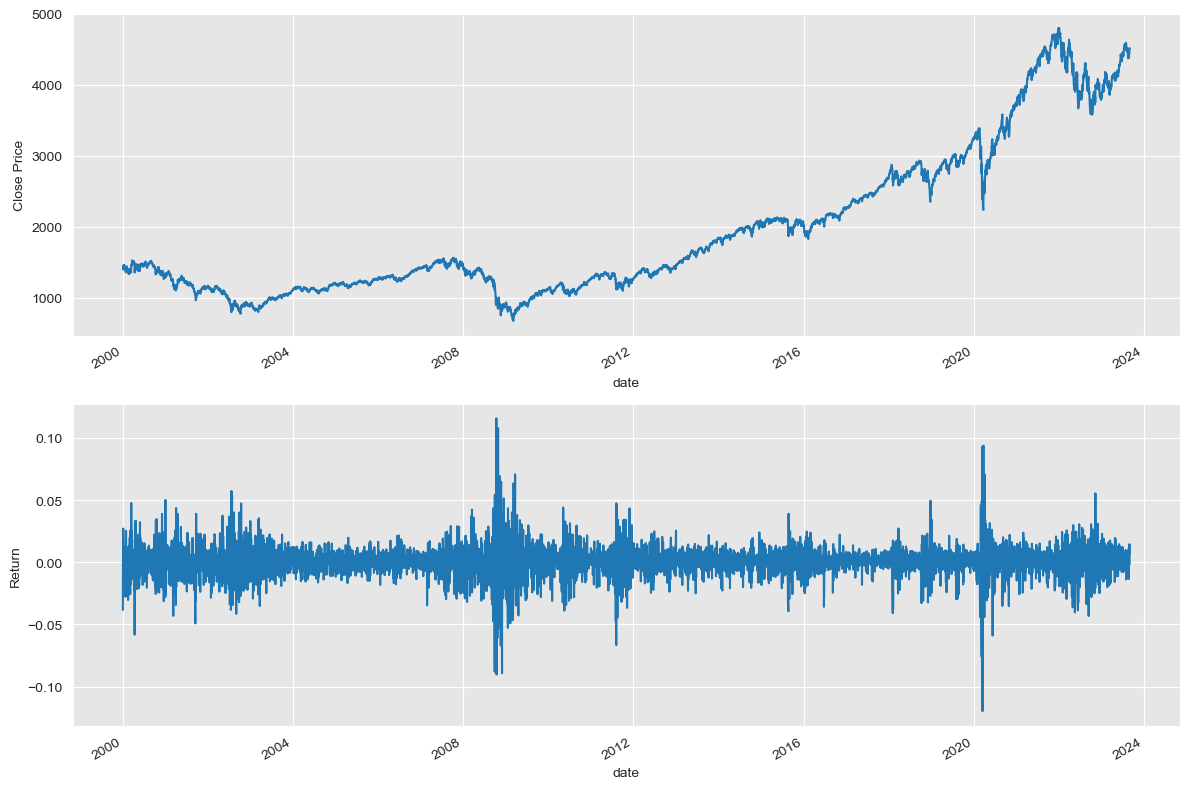

In [15]:
# plot data and returns in two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
data['close'].plot(ax=ax[0])
ax[0].set_ylabel('Close Price')
data['return'].plot(ax=ax[1])
ax[1].set_ylabel('Return')
plt.tight_layout()
plt.show()

# VIX

In [5]:
# VIX index

vix = pd.read_csv('C:/Users/User/Desktop/Data speciale/VIX_data.csv', parse_dates = True, index_col = 'date')
vix.index = pd.to_datetime(vix.index)
vix = vix[vix.index >= '2010-01-01']
vix = vix[vix.index <= '2023-08-31']


# GARCH

In [3]:


returns = data['return'] * 100  # Scale returns
garch = arch.arch_model(returns, vol='Garch', p=1, q=1, dist='Normal')

# Starting index for recursive forecast

end_loc = np.where(returns.index >= '2010-01-01')[0].min()
forecasts = {}

# Recursive fitting and forecasting
for i in range(len(returns) - end_loc + 1):
    res = garch.fit(last_obs=i + end_loc, disp='off')
    temp = res.forecast(horizon=1).variance
    forecasted_value = temp.iloc[0]
    forecasts[forecasted_value.name] = forecasted_value


forecast_df = pd.DataFrame(forecasts).T
forecast_df = np.sqrt(forecast_df / 100)

# Historical Volatility

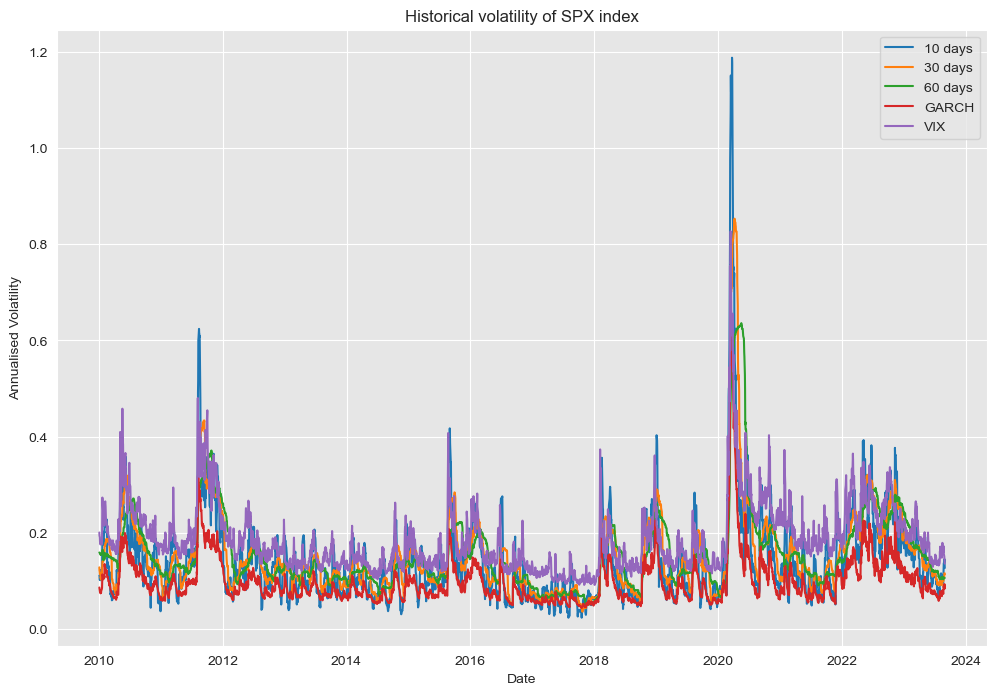

In [17]:
# Historical volatility
vol = pd.DataFrame(columns= ['HistVol10', 'HistVol30', 'HistVol60'])
vol['HistVol10'] = data['return'].rolling(window = 10).std() * np.sqrt(252)
vol['HistVol30'] = data['return'].rolling(window = 30).std() * np.sqrt(252)
vol['HistVol60'] = data['return'].rolling(window = 60).std() * np.sqrt(252)
vol['GARCH'] = forecast_df
vol['VIX'] = vix['close']/100
vol.dropna(inplace = True)

# Plotting the historical volatility
plt.figure(figsize=(12, 8))
plt.plot(vol['HistVol10'], label = '10 days')
plt.plot(vol['HistVol30'], label = '30 days')
plt.plot(vol['HistVol60'], label = '60 days')
plt.plot(vol['GARCH'], label = 'GARCH')
plt.plot(vol['VIX'], label = 'VIX')
plt.xlabel('Date')
plt.ylabel('Annualised Volatility')
plt.title('Historical volatility of SPX index')
plt.legend()
plt.show()

In [18]:

vol.to_csv('C:/Users/User/Desktop/Data speciale/SPX_volatility.csv')